In [33]:
#import libraries

import numpy as np
import matplotlib.pyplot as plt
import random as r

In [34]:
#List of parameters in this project

'''
f - No. of frames
t - No. of slots
sd - Slot duration
a,b for source rate - unifrom random variable
a,b for task size - uniform random variable
p1,p2 for p-persistent Slotted Aloha
'''

'''
Graphical analysis obtained for:

1) plot of percentage of filled slots Vs slot duration
2) plot of percentage of filled slots Vs mean of source rate
3) plot of slot duration Vs mean source rate
4) plot of percentage of filled slots Vs mean of task size
5) plot of slot duration Vs mean task size
6) plot of slot duration Vs mean source rate

'''

'\nGraphical analysis obtained for:\n    \n\n\n'

In [35]:
# number of steps of simulation

#steps = int(input("Enter the number of iterations: "))
steps = 20

In [36]:
# lists to to store input parameters

fl = [] #list to store number of frames
for i in range(steps):
    fl.append(12)
    
tl = [] #list to store number of slots in each frame
for i in range(20):
    tl.append(20)

sdl = [2] #list to store slot duration
for i in range(1,20):
    sdl.append(sdl[i-1]+4)
    
al1 = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40] #list to store lower limit of source rate
bl1 = [8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46] #list to store upper limit of source rate

al2 = [10] #list to store lower limit of task size
for i in range(1,20):
    al2.append(al2[i-1]+50)
    
bl2 = [1500] #list to store upper limit of task size
for i in range(1,20):
    bl2.append(bl2[i-1]+100)

In [37]:
# for loop to input paramters from user
# TODO

'''
for i in range(steps):
    
    ff = int(input("Enter number of frames: "))
    tt = int(input('Enter number of time slots in each frame: '))
    
    s = int(input('Enter slot duration: '))
    
    aa1 = int(input('Enter lower limit of source rate: '))
    bb1 = int(input('Enter upper limit of source rate: '))
    
    aa2 = int(input('Enter lower limit of task size: '))
    bb2 = int(input('Enter upper limit of task rate: '))
    
    fl.append(ff)
    tl.append(tt)
    sdl.append(s)
    al1.append(aa1)
    bl1.append(bb1)
    al2.append(aa2)
    bl2.append(bb2)

'''

'\nfor i in range(steps):\n    \n    ff = int(input("Enter number of frames: "))\n    tt = int(input(\'Enter number of time slots in each frame: \'))\n    \n    s = int(input(\'Enter slot duration: \'))\n    \n    aa1 = int(input(\'Enter lower limit of source rate: \'))\n    bb1 = int(input(\'Enter upper limit of source rate: \'))\n    \n    aa2 = int(input(\'Enter lower limit of task size: \'))\n    bb2 = int(input(\'Enter upper limit of task rate: \'))\n    \n    fl.append(ff)\n    tl.append(tt)\n    sdl.append(s)\n    al1.append(aa1)\n    bl1.append(bb1)\n    al2.append(aa2)\n    bl2.append(bb2)\n\n'

In [38]:
#simulation algorithm

count_l = [] #list to store number of empty slots
count_cl = [] #list to store number of successful aloha
count_cfl = [] #list to store number of collissions
slot_cap = [] #list to store slot capacity

for it in range(steps):
    
    f = fl[it]
    t = tl[it]
    
    #Initial reservation of the slots by the senders

    #initializing with all zeroes
    r=[[0 for columns in range(t)] for rows in range(f)]

    #initial reservation
    r[0]=list(np.random.randint(low=0,high=t+1,size=t))

    #number of unique senders
    n=0

    #contenders - unique ID
    c=[]
    for i in set(r[0]):
        if i!=0:
            c.append(i)
            n=n+1
            
    #transmission slot list
    l=[[0 for columns in range(t)] for rows in range(f)]
    l[0]=r[0]
    
    #defining slot duration. Slot duration common to all slots
    sd = sdl[it]
    fd = sd * t
    
    #defining source rate
    sr = []
    sr=list(np.random.uniform(low = al1[it], high = bl1[it],size=n))
    
    #defining slot capacity
    sc = []

    for i in range(t):
        #print("i=",i)
        for j in range(n):
            #print("j=",j)
            if r[0][i] == c[j]:
                sc.append(sr[j])
                break
            elif r[0][i] == 0:
                sc.append(0)
                break
                
    sc = [(round(num) * sd) for num in sc]
    
    #RANDOM ASSIGNMENT OF TOTAL SIZE TO BE TRANSMITTED BY THE SENDER FOR THAT SLOT INITIALLY
    s = list(np.random.uniform(low = al2[it], high = bl2[it],size=t))
    s = [round(num) for num in s]
        
    #LOOP FOR SLOT ALLOCATION

    d=[[0 for columns in range(t)] for rows in range(f)] # remainder
    d[0]=s

    count = 0
    free = []
    
    count_t = 0 # to count number of empty slots in all frames
    count_c = 0 # to count the number of contentions resolved
    count_c_f = 0 #to count number of failed contentions or collissions

    for i in range(f-1):
        
        
        
        for j in range(t):
        
            if d[i][j]>=sc[j]:
            
                rem=d[i][j]-sc[j]
                d[i+1][j]=rem
                l[i+1][j]=l[i][j]
            
            if d[i][j]<sc[j]:
                l[i+1][j]=0   
        
            if d[i][j]!=0:
                r[i+1][j]=r[i][j]
            
            else:
                r[i+1][j]=0
    
    
        count = 0
        free = []
    
        for k in range(t):

            if l[i][k]==0:
            
                count=count+1
                free.append(k)
        
        count_t = count_t + count
    
        if count != 0:
        
            p1 = count/t
            p2 = n/t
        
            for k in free:
            
                prob = [np.random.rand() for i in range(n)]
            
                ac = []
            
                for m in range(n):
                
                    if(prob[m] < (p1*p2)):
                        ac.append(c[m])
            
            
                if len(ac) == 1:
                    
                    count_c = count_c + 1
                    
                    size = round(np.random.uniform(low = al2[it], high = bl2[it],size=1)[0])
                
                    d[i+1][k] = size
                    r[i+1][k] = c[m]
                    l[i+1][k] = c[m]
                    
                    
                    for j in range(n):
                        if c[m] == c[j]:
                                sc[k] = round(sr[j]) * sd
                                break
                            
            
                else:
                    count_c_f = count_c_f+1
                    continue
        
            else:
                continue
        
    count_l.append(count_t)
    count_cl.append(count_c)
    count_cfl.append(count_c_f)
    slot_cap.append(sc)

In [39]:
#percentage of empty slots

per_emp = []
count_sent = []

for i in range(steps):
    f = fl[i]
    t = tl[i]
    emp = count_l[i]
    count_sent.append((f*t)-emp)
    
    per_emp.append((emp/(f*t))*100)

In [40]:
#percentage of filled slots

per_fill = [(100-num) for num in per_emp]


In [41]:
#percentage free-slot allocations

per_free_all = []

for i  in range(steps):
    
    c1 = count_cl[i]
    c2 = count_cfl[i]
    
    per_free_all.append((c1/(count_l[i] + c1)) * 100)

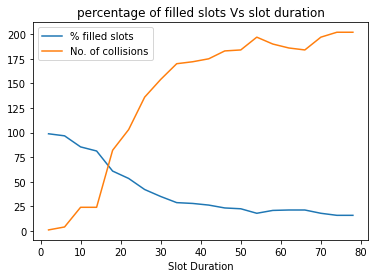

In [42]:
#plot of percentage of filled slots Vs slot duration

plt.plot(sdl,per_fill)
plt.plot(sdl,count_cfl)
plt.xlabel('Slot Duration')
plt.legend(["% filled slots","No. of collisions"])
plt.title("percentage of filled slots Vs slot duration")
plt.show()

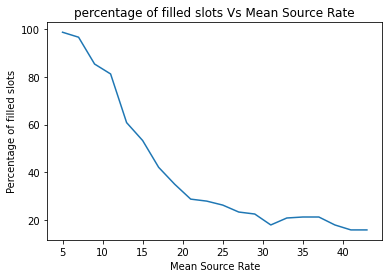

In [43]:
#plot of percentage of filled slots Vs mean of source rate
msr = []

for i in range(steps):
    a = al1[i]
    b = bl1[i]
    msr.append((a+b)/2)

plt.plot(msr,per_fill)
plt.xlabel('Mean Source Rate')
plt.ylabel('Percentage of filled slots')
plt.title("percentage of filled slots Vs Mean Source Rate")
plt.show()

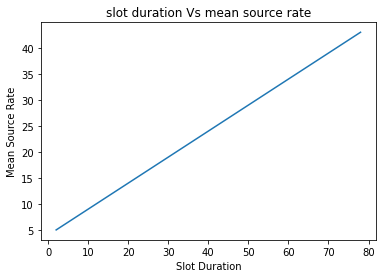

In [44]:
#plot of slot duration Vs mean source rate
plt.plot(sdl,msr)
plt.xlabel("Slot Duration")
plt.ylabel("Mean Source Rate")
plt.title("slot duration Vs mean source rate")
plt.show()

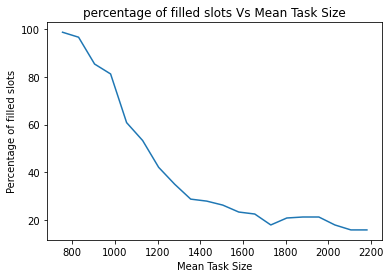

In [45]:
#plot of percentage of filled slots Vs mean of task size


mts = []

for i in range(steps):
    a = al2[i]
    b = bl2[i]
    mts.append((a+b)/2)

plt.plot(mts,per_fill)
plt.xlabel('Mean Task Size')
plt.ylabel('Percentage of filled slots')
plt.title("percentage of filled slots Vs Mean Task Size")
plt.show()

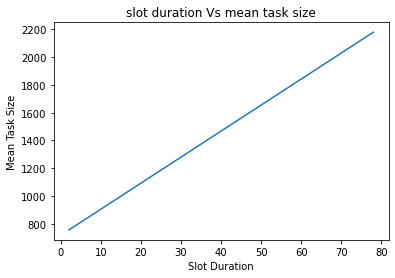

In [46]:
#plot of slot duration Vs mean task size
plt.plot(sdl,mts)
plt.xlabel("Slot Duration")
plt.ylabel("Mean Task Size")
plt.title("slot duration Vs mean task size")
plt.show()

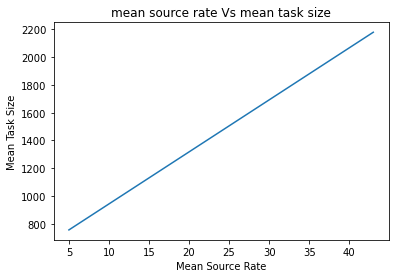

In [47]:
#plot of slot duration Vs mean source rate
plt.plot(msr,mts)
plt.xlabel("Mean Source Rate")
plt.ylabel("Mean Task Size")
plt.title("mean source rate Vs mean task size")
plt.show()

In [48]:
slot_cap = []

for i in range(steps):
    slot_cap.append(msr[i] * sdl[i])

l1 = {"Frame":fl,
      "Slots":tl,
      "Slot Duration":sdl,
      "MSR":msr,
      "MTS":mts,
      "Filled":count_sent,
      "Empty":count_l,
      "Collisions":count_cfl,
      }

import pandas as pd
prma = pd.DataFrame(l1)
prma

,Frame,Slots,Slot Duration,MSR,MTS,Filled,Empty,Collisions
0,12,20,2,5.0,755.0,237,3,1
1,12,20,6,7.0,830.0,232,8,4
2,12,20,10,9.0,905.0,205,35,24
3,12,20,14,11.0,980.0,195,45,24
4,12,20,18,13.0,1055.0,146,94,82
5,12,20,22,15.0,1130.0,128,112,103
6,12,20,26,17.0,1205.0,101,139,136
7,12,20,30,19.0,1280.0,84,156,154
8,12,20,34,21.0,1355.0,69,171,170
9,12,20,38,23.0,1430.0,67,173,172
